In [38]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
test = pd.read_csv("/content/drive/MyDrive/Course Work/Sem 4/Data Analysis and Visualization/Homework 6/DailyDelhiClimateTest.csv")

In [41]:
train = pd.read_csv("/content/drive/MyDrive/Course Work/Sem 4/Data Analysis and Visualization/Homework 6/DailyDelhiClimateTrain.csv")

In [42]:
train

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [43]:
test

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000
110,2017-04-21,34.250000,39.375000,6.962500,999.875000
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000


In [44]:
train["date"] = pd.to_datetime(train["date"])

In [45]:
test["date"] = pd.to_datetime(test["date"])

## Basic Time Series Plot

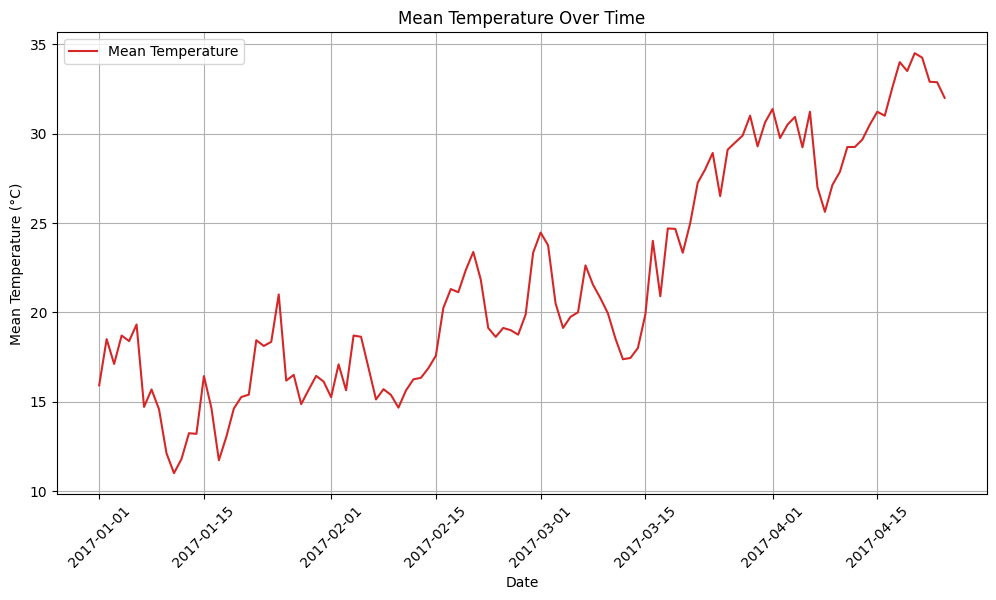

In [46]:
# Plot Mean Temperature Over Time
plt.figure(figsize=(12, 6))
plt.plot(test["date"], test["meantemp"], label="Mean Temperature", color="tab:red")

# Formatting
plt.xlabel("Date")
plt.ylabel("Mean Temperature (°C)")
plt.title("Mean Temperature Over Time")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Show plot
plt.show()

## Rolling Average for Smoothing

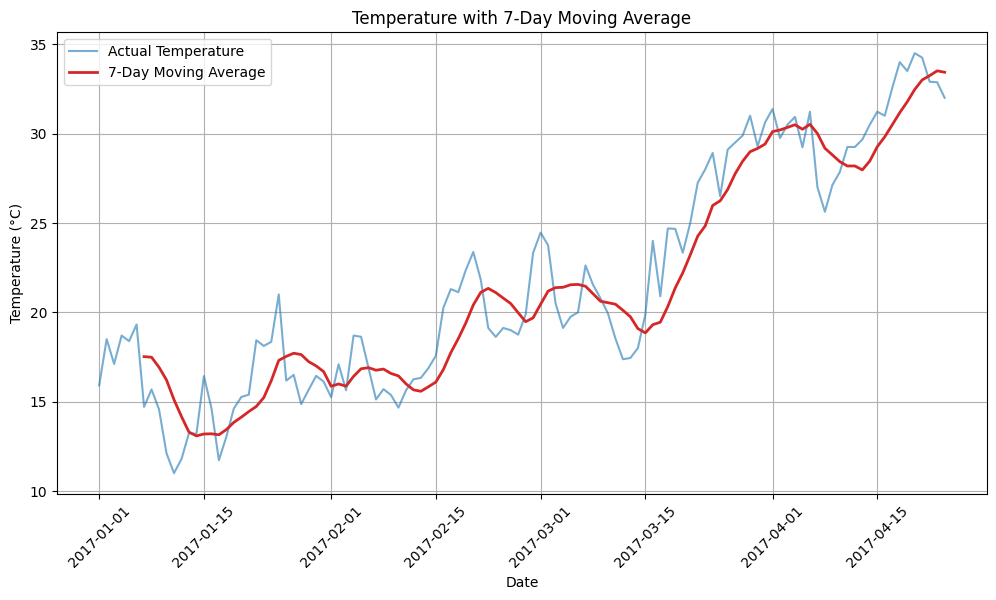

In [47]:
# Compute 7-day Moving Average
test["temp_rolling_avg"] = test["meantemp"].rolling(window=7).mean()

# Plot original vs smoothed data
plt.figure(figsize=(12, 6))
plt.plot(test["date"], test["meantemp"], label="Actual Temperature", color="tab:blue", alpha=0.6)
plt.plot(test["date"], test["temp_rolling_avg"], label="7-Day Moving Average", color="tab:red", linewidth=2)

# Formatting
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Temperature with 7-Day Moving Average")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

## Comparing Two Climate Variables

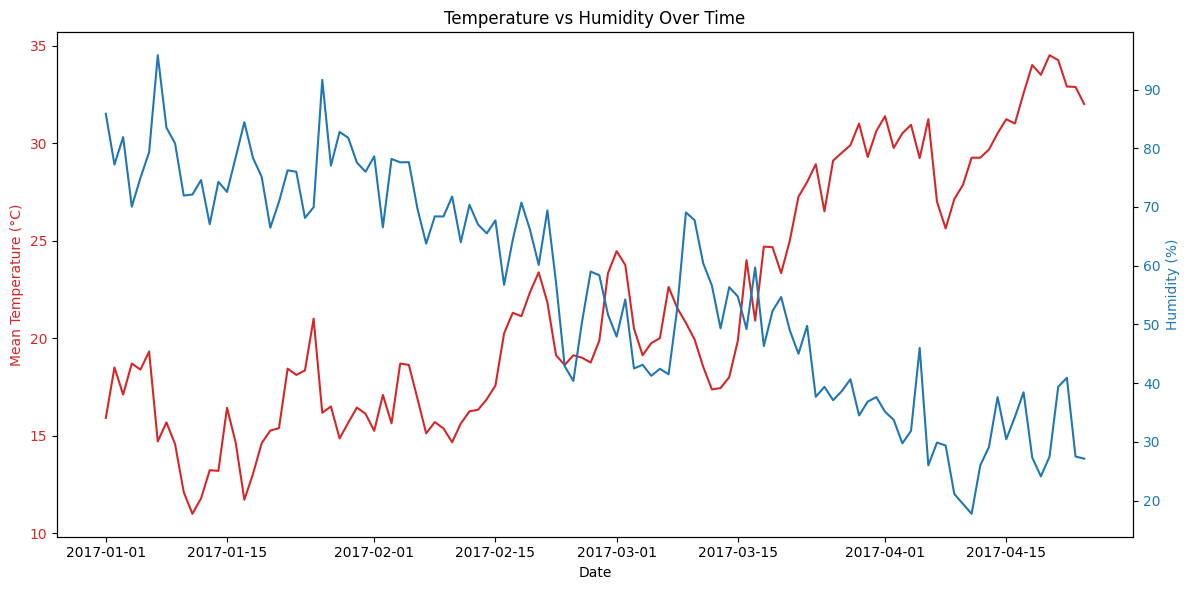

In [48]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Temperature on the left axis
ax1.set_xlabel("Date")
ax1.set_ylabel("Mean Temperature (°C)", color="tab:red")
ax1.plot(test["date"], test["meantemp"], label="Temperature", color="tab:red")
ax1.tick_params(axis="y", labelcolor="tab:red")

# Create second y-axis for Humidity
ax2 = ax1.twinx()
ax2.set_ylabel("Humidity (%)", color="tab:blue")
ax2.plot(test["date"], test["humidity"], label="Humidity", color="tab:blue")
ax2.tick_params(axis="y", labelcolor="tab:blue")

plt.title("Temperature vs Humidity Over Time")
fig.tight_layout()
plt.show()

## Seasonal Trend Analysis

<ipython-input-49-ef0baba5e9c2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="month", y="meantemp", data=test, palette="Reds")


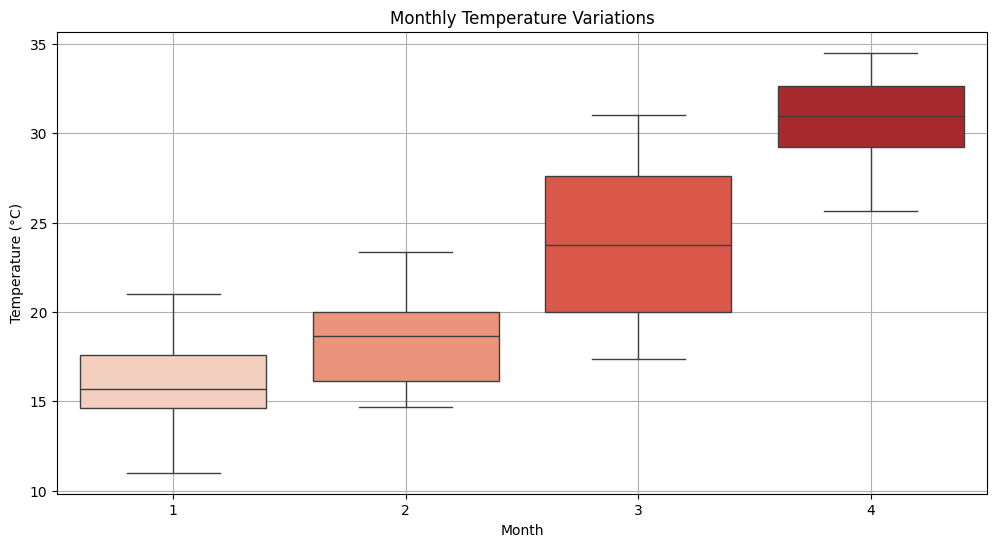

<ipython-input-49-ef0baba5e9c2>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="month", y="humidity", data=test, palette="Blues")


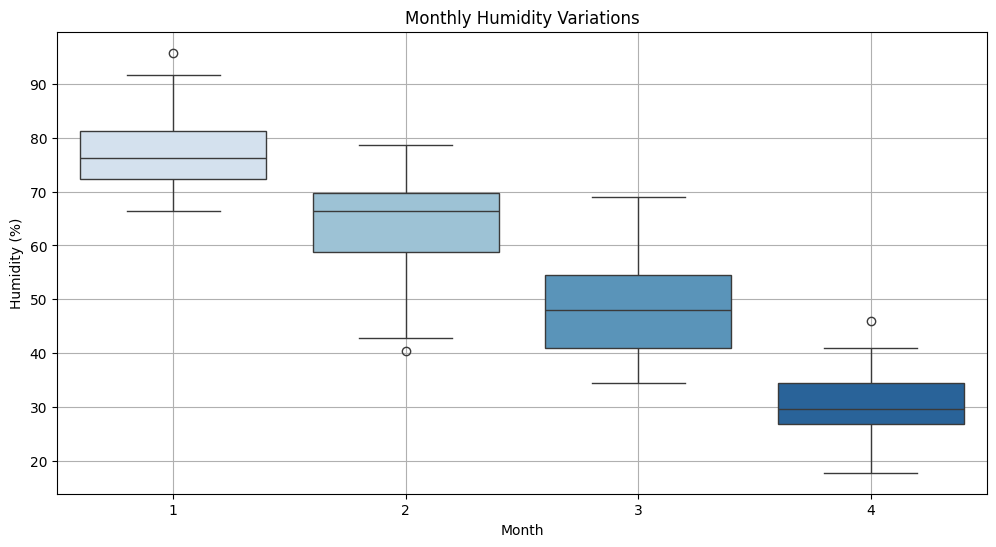

In [49]:
# Extract month from date
test["month"] = test["date"].dt.month

# Boxplot for Temperature
plt.figure(figsize=(12, 6))
sns.boxplot(x="month", y="meantemp", data=test, palette="Reds")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.title("Monthly Temperature Variations")
plt.grid()
plt.show()

# Boxplot for Humidity
plt.figure(figsize=(12, 6))
sns.boxplot(x="month", y="humidity", data=test, palette="Blues")
plt.xlabel("Month")
plt.ylabel("Humidity (%)")
plt.title("Monthly Humidity Variations")
plt.grid()
plt.show()

## Detecting Weather Anomalies

In [50]:
# Function to detect anomalies using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

In [51]:
# Detect outliers for temperature and humidity
temp_anomalies = detect_outliers_iqr(test, "meantemp")
humidity_anomalies = detect_outliers_iqr(test, "humidity")

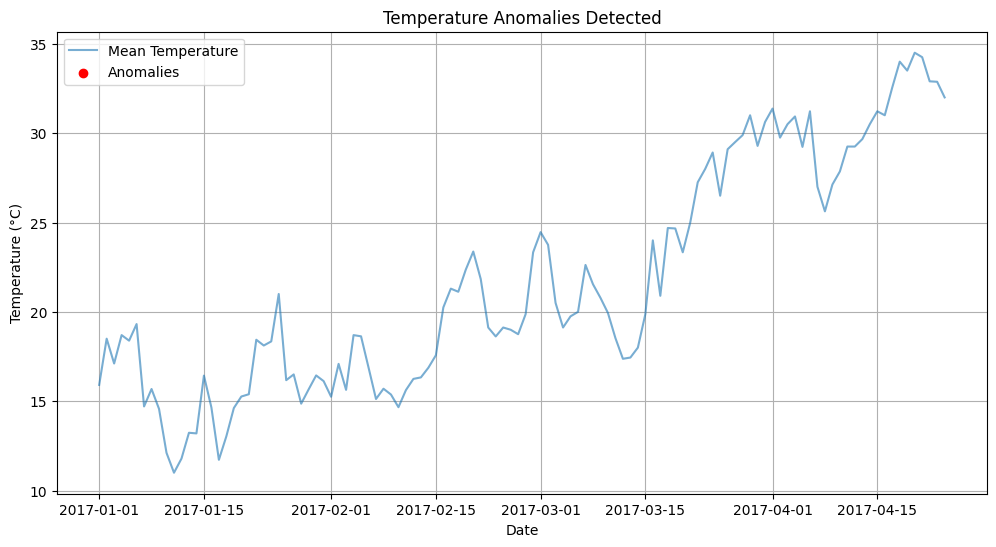

In [52]:
# Plot anomalies on temperature chart
plt.figure(figsize=(12, 6))
plt.plot(test["date"], test["meantemp"], label="Mean Temperature", color="tab:blue", alpha=0.6)
plt.scatter(temp_anomalies["date"], temp_anomalies["meantemp"], color="red", label="Anomalies", zorder=3)
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Anomalies Detected")
plt.legend()
plt.grid(True)
plt.show()